## Homework 1 Report - Nisha Lad

### Exercise 1 - The Collatz Map

In [1]:
import numpy as np, matplotlib.pyplot as plt
from exercise1 import collatz
%matplotlib inline

In [60]:
#Create an array for the stopping times for each Collatz sequence
stoppingTime = []
for i in range(1, 5001, 1):
    seq = collatz(i)
    stoppingTime.append(len(seq) - 1)

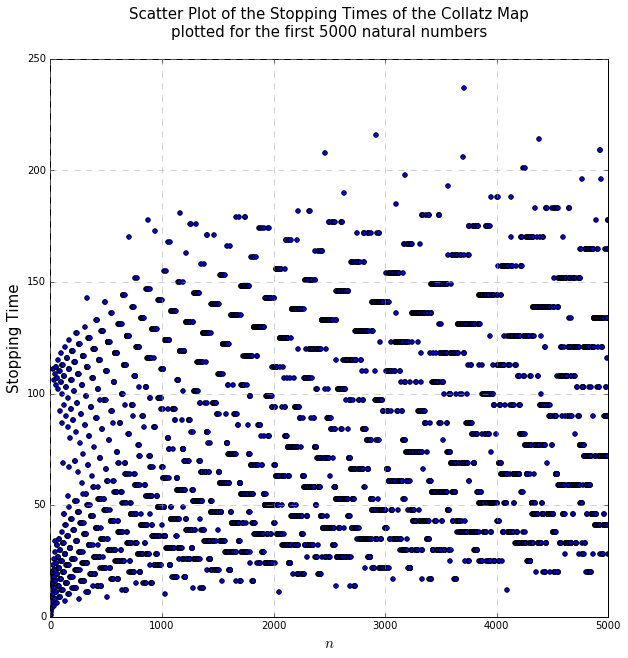

In [79]:
#Make an array of integer values 
#Plot against the corresponding stopping times
integer_n = np.arange(1, 5001, 1)
plt.scatter(integer_n, stoppingTime, c='blue')
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.xlabel('$n$', size = 15)
plt.ylabel('Stopping Time', size = 15)
plt.xlim(0, 5000)
plt.ylim(0, 250)
plt.title('Scatter Plot of the Stopping Times of the Collatz Map\n' 
          'plotted for the first 5000 natural numbers\n', size = 15)

The Collatz conjecture states that no matter which n is an element of the natural numbers you begin with, the sequence of integers n_k will be finite and end with the number one. From the image above by testing the first 5000 natural numbers we can infer that the Collatz Conjecture is valid, as within the first 5000 natural numbers there are the majority of different cases of numbers tested. I.e. the first 5000 natural numbers contain odd, even, prime, square and cube numbers, which have all been tested to give a finite stopping time as they all eventuall end with a sequence of (...4, 2, 1). Therefore we can infer that the Conjecture is true. It does seem more likely if we plot the stopping times for larger n.

We can see from the graph above that there exists a pattern amongst the natural numbers and their stopping times grouping several consecutive natural numbers together with a similar stopping time, before a number is reached with a stopping time much higher than its surrounding natural numbers. Hence, by plotting the stopping time for larger n, we would see this pattern to continue and the stopping time would increase further.

However, by simply testing the first 5000 natural numbers we cannot sufficiently conclude that the Collatz is true for all natural numbers, as there may exist an infinite Collatz sequence for a particular n_k which takes an infinite stopping time to reach one. I.e. this sequence contains a loop such that C(a0) = a1, C(a1) = a2,.....C(aq) = a0. In this example we enter an infinite loop within the Collatz map in which case we would never reach 1 and hence the stopping time would be infinite. In this case the Collatz conjecture would be false, however up to present there has not been such a number that has been found to produce an infinite sequence within the Collatz map.

From analysing this graph, it predicts that for plotting the stopping time for larger n, this pattern of grouping consecutive number stopping times together before reaching a number with a much greater stopping time, would continue for larger n and hence a larger stopping time. However, it is not easy to predict from this graph whether a loop would occur for a certain natural number, and hence give rise to  the Conjecture being false.

### Exercise 2 - The Gradient Descent Algorithm

In [4]:
from exercise2 import gradient_descent, gradient_step

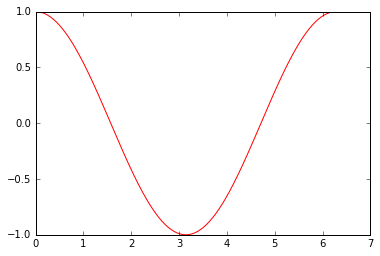

In [5]:
x = np.linspace(0, 2*np.pi, 201)
f = lambda x : np.cos(x)
df = lambda x : -1.0*np.sin(x)
plt.plot(x, np.cos(x), color='r')

#guess = gradient_step()

### Exercise 3 - The Jacobi and Gauss-Seidel Iteration Methods

In [6]:
from exercise3 import jacobi_iteration, gauss_seidel_iteration

In [17]:
#Create matrix A
Neg5 = np.diag([-5 for x in range(32)])
OffDiag1 = np.diag(np.ones(31), k=1) + np.diag(np.ones(31), k=-1)
OffDiag2 = np.diag(np.ones(30), k=2) + np.diag(np.ones(30), k=-2)
A = Neg5 + OffDiag1 + OffDiag2

In [24]:
def jacobi_points(myEpsilon=1e-8):
    """Function calculates residual in solving linear matrix problems
    using the jacobi iteration method.
    
    Parameters
    ----------
    myEpsilon : float
                convergence threhold used within jacobi_iteration method
         
    Returns
    -------
    jacobi_residual : numpy array 
                      array of residual points as solution converges
    """
    b = np.sin(10*np.linspace(-1,1,32));
    jacobi_residual = []
    x0 = np.ones(32)
    for i in range(0, 32):
        xk = jacobi_iteration(A, b, x0, epsilon=myEpsilon)
        rk = b - np.dot(A, xk)
        norm_rk = np.linalg.norm(rk, 1)
        jacobi_residual.append(norm_rk)
        x0 = xk
    return jacobi_residual

In [25]:
def Gauss_Seidel_points(myEpsilon=1e-8):
    """Function calculates residual in solving linear matrix problems
    using the gauss-seidel iteration method.
    
    Parameters
    ----------
    myEpsilon : float
                convergence threhold used within gauss_seidel_iteration method
         
    Returns
    -------
    GS_residual : numpy array 
                  array of residual points as solution converges
    """
    b = np.sin(10*np.linspace(-1,1,32));
    GS_residual = []
    x0 = np.ones(32)
    for i in range(0, 32):
        xk = gauss_seidel_iteration(A, b, x0, epsilon=myEpsilon)
        rk = b - np.dot(A, xk)
        norm_rk = np.linalg.norm(rk, 1)
        GS_residual.append(norm_rk)
        x0 = xk
    return GS_residual

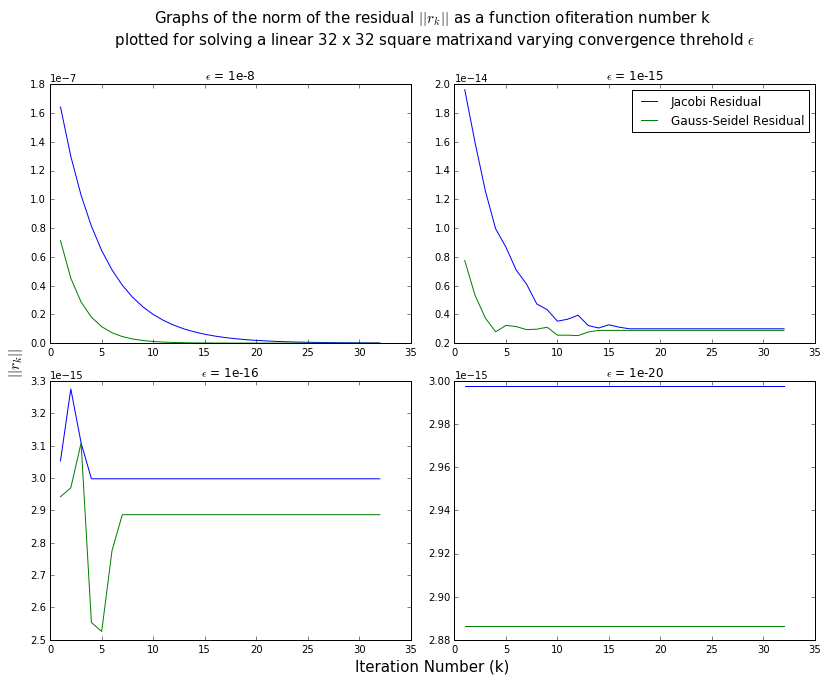

In [78]:
ittr = np.linspace(1, 32, 32)
#fig = plt.figure(figsize=(12, 10))

plt.title('Graphs of the norm of the residual $||r_k||$ as a function of' 
          'iteration number k\n plotted for solving a linear 32 x 32 square matrix'
          'and varying convergence threhold $\epsilon$\n\n', size = 15)

ax = fig.add_subplot(111) # the big subplot
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

sub1 = fig.add_subplot(221)
sub1.set_title('$\epsilon$ = 1e-8')
sub1.plot(ittr, jacobi_points(), label='Jacobi Residual')
sub1.plot(ittr, Gauss_Seidel_points(), label='Gauss-Seidel Residual')

sub2 = fig.add_subplot(222)
sub2.set_title('$\epsilon$ = 1e-15')
sub2.plot(ittr, jacobi_points(myEpsilon=1e-15), label='Jacobi Residual')
sub2.plot(ittr, Gauss_Seidel_points(myEpsilon=1e-15), label='Gauss-Seidel Residual')
plt.legend(loc='best')

sub3 = fig.add_subplot(223)
sub3.set_title('$\epsilon$ = 1e-16')
sub3.plot(ittr, jacobi_points(myEpsilon=1e-16), label='Jacobi Residual')
sub3.plot(ittr, Gauss_Seidel_points(myEpsilon=1e-16), label='Gauss-Seidel Residual')

sub4 = fig.add_subplot(224)
sub4.set_title('$\epsilon$ = 1e-20')
sub4.plot(ittr, jacobi_points(myEpsilon=1e-20), label='Jacobi Residual')
sub4.plot(ittr, Gauss_Seidel_points(myEpsilon=1e-20), label='Gauss-Seidel Residual')

ax.set_xlabel('Iteration Number (k)', size = 15)
ax.set_ylabel('$||r_k||$', size = 15)

plt.tight_layout()
plt.show()

As you can see from the plots above, the Gauss-Seidal iteration method converges much more rapidly than the Jacobi iteration method. This is valid, given the number of operations needed to calculate each iteration within both the Jacobi and Gauss-Seidel methods, and hence we predict that the Gauss-Seidel method should converge to the approximate solution with fewer number of iterations in comparison to the Jacobi method.

As we decrease the convergence threshold $\epsilon$ from 10^(-8) to 10^-(15) to 10^-(20), we see that these numerical methods using iterative processes to solve matrix equations start to break down. The approximations to solving the equation Ax = b (both the Jacobi and Gauss-Seidel methods) are no longer valid as they begin to collape. We see that the norm of rk begins to change throughout the iteration process from decreasing at an exponential rate to remaining constant as the approximation breaks down, and hence does not converge to a appropriate solution.